In [63]:
import pandas as pd
import datetime as dt
import  matplotlib.pyplot as plt
import numpy as np

In [6]:
data = pd.read_excel('bee.xlsx')
data['START_TIME'] = data['START_TIME'].dt.date
data

,START_TIME,VOLUM_KB,CHARGE_AMT
0,2019-07-08,1290.24,200.0
1,2019-07-08,614.40,0.0
2,2019-07-08,614.40,0.0
3,2019-07-08,450.56,0.0
4,2019-07-08,20.48,0.0
...,...,...,...
101,2019-10-14,1617.92,0.0
102,2019-10-14,1617.92,0.0
103,2019-10-14,491.52,0.0
104,2019-11-04,40.96,0.0


In [40]:
#Суммарыне данные по дням
#Конечно можно вывести суммарный расход
summ_data = data.groupby('START_TIME').sum()
summ_data

,VOLUM_KB,CHARGE_AMT
START_TIME,,
2019-07-08,6184.96,200.00
2019-08-02,1822.72,300.00
2019-08-03,2805.76,200.00
2019-08-26,97782.84,488.93
2019-10-11,2068.48,200.00
2019-10-13,3174.40,200.00
2019-10-14,15052.80,200.00
2019-11-04,1658.88,200.00


In [82]:
#Расчет частоты использования дополнительного трафика

func = lambda x: 100*x.count()/summ_data.shape[0]
summ_data['Доп трафик'] = np.where(summ_data[['CHARGE_AMT']]%100==0, 'Нет', 'Да')
table_pivot = summ_data.pivot_table(index = 'Доп трафик', aggfunc = func)
table_pivot['CHARGE_AMT'] = table_pivot['CHARGE_AMT'].astype(str) + '%'
table_pivot = table_pivot[['CHARGE_AMT']].rename(columns={'CHARGE_AMT': 'Доля дней с использованием доп. трафика  '})
table_pivot

,Доля дней с использованием доп. трафика
Доп трафик,
Да,12.5%
Нет,87.5%


             VOLUM_KB  CHARGE_AMT
START_TIME                       
7             6184.96      200.00
8           102411.32      988.93
10           20295.68      600.00
11            1658.88      200.00
 Среднее(по медиане) кол-во сессий в день 400.0


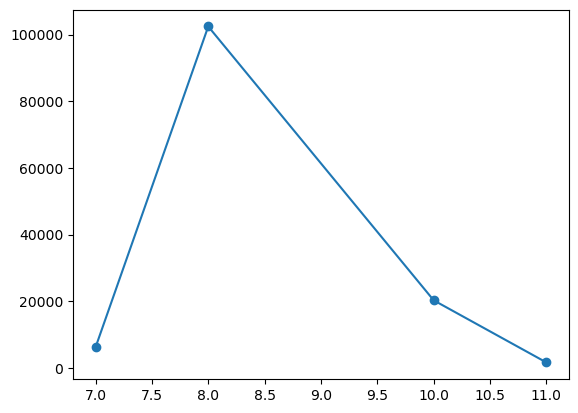

In [36]:
#График потребления трафика по месяцам, там же можно разбить на дни 
value_per_month = data.groupby(pd.DatetimeIndex(data['START_TIME']).month).sum()
print(value_per_month)
plt.plot(value_per_month.index, value_per_month['VOLUM_KB'], marker='o')
#Наблюдается пик потребления трафика в августе

 В среднем (по медиане) траты на услугу в месяц составляют 400.0 руб.


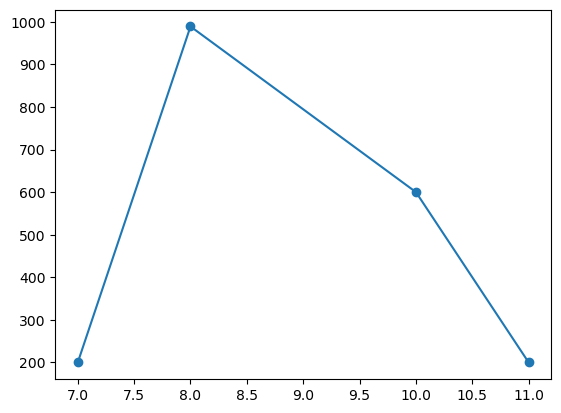

In [39]:
#График расходов по месяцам, там же можно разбить на дни 
plt.plot(value_per_month.index, value_per_month['CHARGE_AMT'], marker='o')
print(f" В среднем (по медиане) траты на услугу в месяц составляют {value_per_month.median()['CHARGE_AMT']} руб.")

In [30]:
#Колличтество сессий в день
count_ses = data.groupby('START_TIME').count()[['CHARGE_AMT','VOLUM_KB']]
print('Колличтество сессий в день')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAjEAAAGdCAYAAADjWSL8AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAABcvElEQVR4nO3deViU5f4G8Hs2hkUYWWcYRcV9AZc0F3Irt1S0zTRNj6anLE2lLJfq/LQ64VJHS+1YWUdLM1uUMnFDMwJxwR1wV1IQRlxgBgRmYHh/fyBTKCjgDO/McH+ua/5g5pnh+/R6NTfv933eRyIIggAiIiIiByMVuwAiIiKimmCIISIiIofEEENEREQOiSGGiIiIHBJDDBERETkkhhgiIiJySAwxRERE5JAYYoiIiMghycUuwFZKSkqQkZEBT09PSCQSscshIiKiKhAEAbm5udBqtZBK732uxWlDTEZGBoKCgsQug4iIiGogLS0NDRs2vOcYpw0xnp6eAEr/I3h5eYlcDREREVWFwWBAUFCQ5Xv8Xpw2xJS1kLy8vBhiiIiIHExVLgXhhb1ERETkkBhiiIiIyCExxBAREZFDYoghIiIih8QQQ0RERA6p2iHmjz/+wLBhw6DVaiGRSPDzzz+Xe10QBMyfPx9arRZubm7o27cvUlJSyo0xGo2YNm0a/Pz84OHhgeHDhyM9Pb3cmOzsbIwbNw4qlQoqlQrjxo1DTk5OtSdIREREzqnaIebWrVvo0KEDVqxYUeHrixcvxpIlS7BixQokJiZCo9FgwIAByM3NtYyJiIhAVFQUNmzYgPj4eOTl5SE8PBxms9kyZsyYMTh27Bi2b9+O7du349ixYxg3blwNpkhEREROSXgAAISoqCjLzyUlJYJGoxEWLlxoea6wsFBQqVTCZ599JgiCIOTk5AgKhULYsGGDZcyVK1cEqVQqbN++XRAEQTh58qQAQNi/f79lzL59+wQAwunTp6tUm16vFwAIer3+QaZIREREtag6399WvSYmNTUVOp0OAwcOtDynVCrRp08fJCQkAAAOHz6MoqKicmO0Wi1CQkIsY/bt2weVSoVu3bpZxnTv3h0qlcoy5k5GoxEGg6Hcg+hO5hIB+y7cwC/HrmDfhRswlwhil0RERDVk1Tv26nQ6AIBarS73vFqtxqVLlyxjXFxc4O3tfdeYsvfrdDoEBATc9fkBAQGWMXdasGAB3n333QeeAzmv7cmZePfXk8jUF1qeC1S5Yt6wtng8JFDEyoiIqCZssjrpzlsFC4Jw39sH3zmmovH3+py5c+dCr9dbHmlpaTWonJzV9uRMvLLuSLkAAwA6fSFeWXcE25MzRaqMiIhqyqohRqPRAMBdZ0uysrIsZ2c0Gg1MJhOys7PvOebq1at3ff61a9fuOstTRqlUWvZJ4n5J9HfmEgHv/noSFTWOyp5799eTbC0RETkYq4aY4OBgaDQaxMTEWJ4zmUyIjY1FWFgYAKBz585QKBTlxmRmZiI5OdkypkePHtDr9Th48KBlzIEDB6DX6y1jiKrqYOrNu87A/J0AIFNfiIOpN2uvKCIiemDVviYmLy8P58+ft/ycmpqKY8eOwcfHB40aNUJERAQiIyPRokULtGjRApGRkXB3d8eYMWMAACqVCpMmTcLMmTPh6+sLHx8fvPHGGwgNDUX//v0BAG3atMHjjz+OF198EZ9//jkA4KWXXkJ4eDhatWpljXlTHZKVW3mAqck4IiKyD9UOMYcOHcKjjz5q+fn1118HAIwfPx5r1qzBrFmzUFBQgClTpiA7OxvdunXDzp074enpaXnP0qVLIZfLMXLkSBQUFKBfv35Ys2YNZDKZZcy3336L6dOnW1YxDR8+vNJ70xDdS4Cnq1XHERGRfZAIguCUFwIYDAaoVCro9XpeH1PHmUsE9Fz0G3T6wgqviwEAuVSCX159BO20qlqtjYiIyqvO9zf3TiKnJ5NKMG9Y23uOKS4R8PR/E7Bu/yU4aa4nInI6DDFUJzweEohlozvhzgX6gSpXLB7RHn1b+cNYXIJ3fk7GlG+PQF9QJEqdRERUdVa92R2RPfNQyiAAqO+mwLzh7aDxckXXYB/IpBKMeKghvopPxaLtp7EtWYcT6XosG90JnRt73/dziYhIHDwTQ3VG9InS+xc92akBnurUAD2a+UImLT03I5VK8GLvpvjplTA08nHHlZwCjPx8H/77+3mU8P4xRER2iSGG6gRjsRk7T5aGmKHtK99ioGNQfWyZ3hPh7QNhLhGwePsZjF99kMuviYjsEEMM1Qnx564jt7AYai8lOje6d4vIy1WB5aM7YeHToXBVSBF37jqGfBKHP85eq6VqiYioKhhiqE6IPlG6N9LgkEBIpffexwso3bvrua6NsPnVnmiprofreSb8438HsWj7aRSZS2xdLhERVQFDDDm9wiIzYk6W7sUVfo9WUkVaqj2x+dWeGNOtEQBg5e8XMPLzfUi7mW/1OomIqHoYYsjpxZ27jlxjMTRernjoPq2kirgqZIh8KhSfjnkInq5yHL2cgyHL4rAtiTtfExGJiSGGnF70iQwAwJDQqrWSKjO0fSC2Tu+FjkH1kVtYjFe+PYK3o5JQWGS2VqlERFQNDDHk1P7eSrrXqqSqCvJxx48v98DLfZoBAL49cBlPrNiLc1dzH/iziYioehhiyKnFnr2GWyYztCpXdAqqb5XPVMikmDO4Nb6Z2BV+9Vxw5mouhq2Ix/eJl7llARFRLWKIIae29fZ1Kw/aSqpI75b+2DqjF3o290NhUQlmb0zC9A3HkFvILQuIiGoDQww5rcIiM3ZZsZVUkQBPV3wzsStmPd4KMqkEvx7PwNBl8TiRnmOT30dERH9hiCGn9fuZ0lZSg/pu6GilVlJFpFIJpvRtjh8md0eD+m64fDMfz6xMwJdxF7llARGRDTHEkNOKtrSSNJBIrNtKqkjnxj7YOr0XHm+nQZFZwL+jT2HS14m4kWe0+e8mIqqLGGLIKRWYzNh9qqyVpK2136tyV2Dl2Ifw/pMhcJFLsefMNQz+JA4JF67XWg1ERHUFQww5pd/PZCH/diupQ0NVrf5uiUSCcd0b45epj6CZvweyco14/ssDWLLzDIq5ZQERkdUwxJBT2nK7lRTePrBWWkkVaRPohV+n9cTILg0hCMCy385j9Kr9yMgpEKUeIiJnwxBDTqfAZMZvp7IA2G5VUlW5u8ixeEQHfPJcR9RTypH4ZzYGfxKHnSk6UesiInIGDDHkdPacyUJBkRlBPm4IbVC7raTKPNGxAbZM64nQBiroC4rw0trDmL85BcZibllARFRTDDHkdKJPlLaShoZqRWslVaSJnwc2vhKGST2DAQBrEv7E0/9NwMVreSJXRkTkmBhiyKnkm4qx+3TpqqRwkVtJFXGRS/Gv8Lb434Qu8HZXICXDgPDl8dh0JF3s0oiIHA5DDDmV305nobCoBI193dFO6yV2OZV6rLUa22b0RrdgH+SbzHj9h+N4/YdjuGUsFrs0IiKHwRBDTqWslTQkVLxVSVWlUbli/Yvd8Vr/lpBKgE1HriB8eTySr+jFLo2IyCEwxJDTuGUsxm+nb69KCrW/VlJFZFIJZvRvge9e7A6NlytSr9/C0/9NwJq9qdwRm4joPhhiyGnsPp0FY3EJmth5K6ki3Zr6YtuMXujfJgAmcwnm/3oSL35zGNm3TGKXRkRktxhiyGlEn8gAUHpvGHtvJVXE28MFq/7RBfOGtYWLTIpdp65iyLI4HEy9KXZpRER2iSGGnEKesRh7zlwDULq02lFJJBK88EgwNk0JQ7CfBzL1hXjui31YtvsczNwRm4ioHIYYcgq7T12FqbgETf080CbQU+xyHlhIAxV+ndYTT3VqgBIBWBJzFmO/PICrhkKxSyMishsMMeQULDe4c9BWUkXqKeVYOqojPnq2A9wUMuy7eAODP4nDntsXLxMR1XU2CTG5ubmIiIhA48aN4ebmhrCwMCQmJlpeFwQB8+fPh1arhZubG/r27YuUlJRyn2E0GjFt2jT4+fnBw8MDw4cPR3o6bwhGd8stLMLvZ2+3kuzwBncPakTnhtgyvSfaBHrh5i0TXliTiA+iT8JUzB2xiahus0mI+ec//4mYmBisXbsWSUlJGDhwIPr3748rV64AABYvXowlS5ZgxYoVSExMhEajwYABA5Cbm2v5jIiICERFRWHDhg2Ij49HXl4ewsPDYTZzrxkqb/epLJiKS9DM3wOt1I7fSqpIM/96iJoShvE9GgMAVsWlYsRnCbh045bIlRERiUciWPlmFAUFBfD09MQvv/yCoUOHWp7v2LEjwsPD8f7770Or1SIiIgKzZ88GUHrWRa1WY9GiRZg8eTL0ej38/f2xdu1ajBo1CgCQkZGBoKAgbN26FYMGDbpvHQaDASqVCnq9Hl5ejrXclqrnn18fwq5TVzH9seZ4fWArscuxuR0pOsz66QT0BUWop5Qj8ulQDO/guBczExH9XXW+v61+Jqa4uBhmsxmurq7lnndzc0N8fDxSU1Oh0+kwcOBAy2tKpRJ9+vRBQkICAODw4cMoKioqN0ar1SIkJMQy5k5GoxEGg6Hcg5yfobAIf1haSXXji3xQOw22zuiFLo29kWcsxvTvjmL2TyeQb+KWBURUt1g9xHh6eqJHjx54//33kZGRAbPZjHXr1uHAgQPIzMyETqcDAKjV6nLvU6vVltd0Oh1cXFzg7e1d6Zg7LViwACqVyvIICgqy9tTIDu06eRUmcwmaB9RDS3U9scupNQ3qu2HDS90x7bHmkEiA7w+lYfiKvTitY3gnorrDJtfErF27FoIgoEGDBlAqlVi2bBnGjBkDmUxmGXPnChJBEO67quReY+bOnQu9Xm95pKWlPfhEyO5ZViU5wF5J1iaXSTFzYCt8O6kb/D2VOJ+VhydW7MW6/Ze4ZQER1Qk2CTHNmjVDbGws8vLykJaWhoMHD6KoqAjBwcHQaDQAcNcZlaysLMvZGY1GA5PJhOzs7ErH3EmpVMLLy6vcg5ybvqAIf5xz3lVJVRXW3A/bZvRC31b+MBaX4J2fkzHl2yPQFxSJXRoRkU3Z9D4xHh4eCAwMRHZ2Nnbs2IEnnnjCEmRiYmIs40wmE2JjYxEWFgYA6Ny5MxQKRbkxmZmZSE5Otowh2nXyKorMAlqq66Glk65Kqiq/ekr8b/zDeHtIG8ilEmxL1mHIJ3E4cjn7/m8mInJQclt86I4dOyAIAlq1aoXz58/jzTffRKtWrfDCCy9AIpEgIiICkZGRaNGiBVq0aIHIyEi4u7tjzJgxAACVSoVJkyZh5syZ8PX1hY+PD9544w2Ehoaif//+tiiZHFB0UlkrqW5c0Hs/UqkEL/ZuioeDfTDtuyNIu1mAZz/bhzcGtsLk3k0hldatdhsROT+bhBi9Xo+5c+ciPT0dPj4+eOaZZ/DBBx9AoVAAAGbNmoWCggJMmTIF2dnZ6NatG3bu3AlPz7/+ml66dCnkcjlGjhyJgoIC9OvXD2vWrCl3XQ3VXfr8IsRZWkkakauxLx2D6iN6ei+8tSkJW05kYtH200i4cB1LRnaEv6dS7PKIiKzG6veJsRe8T4xz+/FQGt786QRaqT2x47XeYpdjlwRBwPeJaZj/awoKi0rgV0+JpaM6oFcLf7FLIyKqlKj3iSGqDZZWUh2+oPd+JBIJnuvaCJtf7YmW6nq4nmfEuK8OYtH20ygyc8sCInJ8DDHkcHLyTYg/dx0AMCSUIeZ+Wqo9sfnVnhjTrREAYOXvFzDy831Iu5kvcmVERA+GIYYczs6UqyguEdBa44nmAXXnBncPwlUhQ+RTofh0zEPwdJXj6OUcDFkWh223z2gRETkihhhyOFtuf/GGs5VUbUPbB2Lr9F7oGFQfuYXFeOXbI3g7KgmFRdxYlYgcD0MMOZTsWybsPc9W0oMI8nHHjy/3wMt9mgEAvj1wGU9+uhfns3Lv804iIvvCEEMOZedJHcwlAtoGeqGpP1tJNaWQSTFncGt8M7Er/Oq54LQuF+HL4/FDYhq3LCAih8EQQw5lywmuSrKm3i39sXVGL/Rs7ofCohLM2ngCMzYcQ24htywgIvvHEEMO4+YtExIu3ABQuuEjWUeApyu+mdgVbw5qBZlUgs3HMzB0WTxOpOeIXRoR0T0xxJDD2JFS2kpqp/VCEz8PsctxKlKpBFMfbY4fJndHg/puuHwzH8+sTMCXcRdRUsL2EhHZJ4YYchjRbCXZXOfGPtg6vRceb6dBkVnAv6NPYdLXibiRZxS7NCKiuzDEkEO4kWdEwoXSVUlsJdmWyl2BlWMfwvtPhsBFLsWeM9cw+JM4y39/IiJ7wRBDDmF7ig4lAhDaQIXGvmwl2ZpEIsG47o3xy9RH0MzfA1m5Rjz/5QEs2XkGxdyygIjsBEMMOQS2ksTRJtALv07riZFdGkIQgGW/nceYVQeQkVMgdmlERAwxZP+u5xmx/yJXJYnF3UWOxSM64JPnOqKeUo6Df97EkGVxiDl5VezSiKiOY4ghu7c9ubSV1KGhCkE+7mKXU2c90bEBtkzridAGKuTkF+HFbw5h/uYUGIu5ZQERiYMhhuweW0n2o4mfBza+EoZJPYMBAGsS/sTT/03AxWt5IldGRHURQwzZtazcQhxILW0lca8k++Ail+Jf4W3xvwld4O2uQEqGAeHL47HpSLrYpRFRHcMQQ3ZtR1krKag+GnqzlWRPHmutxrYZvdEt2Af5JjNe/+E4Xv/hGG4Zi8UujYjqCIYYsmtleyWF8yyMXdKoXLH+xe54rX9LSCXApiNXMGx5PJKv6MUujYjqAIYYsltZhkIc/PMmAGBwqEbkaqgyMqkEM/q3wHcvdofGyxUXr9/C0/9NwJq9qdwRm4hsiiGG7Na2ZB0EAejUiK0kR9CtqS+2zeiF/m0CYDKXYP6vJ/HS2sPIvmUSuzQiclIMMWS3LKuS2EpyGN4eLlj1jy6YN6wtXGRSxJy8iiHL4nAw9abYpRGRE2KIIbt01VCIxEulX3xcleRYJBIJXngkGJumhKGJrzsy9YV47ot9WLb7HMzcEZuIrIghhuzStqRMCALQubE3tPXdxC6HaiCkgQpbpvfCU50aoEQAlsScxdgvD+CqoVDs0ojISTDEkF2KTmIryRnUU8qxdFRHfPRsB7gpZNh38QYGfxKHPWeyxC6NiJwAQwzZHZ2+EIl/ZgNgK8lZjOjcEFum90SbQC/cvGXCC6sT8UH0SZiKuSM2EdUcQwzZna23z8J0aewNjcpV5GrIWpr510PUlDCM79EYALAqLhUjPkvApRu3RK6MiBwVQwzZHUsriXslOR1XhQzvPhGCz8d1hspNgRPpegxdFo/NxzPELo2IHBBDDNmVjJwCHL6UDYkEGBzCEOOsBrXTYOuMXujS2Bt5xmJM/+4oZv90AvkmbllARFXHEEN2payV9HBjH7aSnFyD+m7Y8FJ3THusOSQS4PtDaRi+Yi9O6wxil0ZEDoIhhuwKW0l1i1wmxcyBrfDtpG7w91TifFYenlixF+v2X+KWBUR0XwwxZDeu5BTg6OWc260k7pVUl4Q198O2Gb3Qp6U/jMUleOfnZExdfwT6giKxSyMiO2b1EFNcXIx33nkHwcHBcHNzQ9OmTfHee++hpOSvpZSCIGD+/PnQarVwc3ND3759kZKSUu5zjEYjpk2bBj8/P3h4eGD48OFIT0+3drlkR7bdPgvTtYkPArzYSqpr/OopsXrCw3hrSGvIpRJsTdJhyCdxOHI5W+zSiMhOWT3ELFq0CJ999hlWrFiBU6dOYfHixfjwww+xfPlyy5jFixdjyZIlWLFiBRITE6HRaDBgwADk5uZaxkRERCAqKgobNmxAfHw88vLyEB4eDrPZbO2SyU5sub1XUjhbSXWWVCrBS72b4adXwhDk44YrOQV49rN9WPn7BZRwywIiuoNEsHLjOTw8HGq1Gl999ZXluWeeeQbu7u5Yu3YtBEGAVqtFREQEZs+eDaD0rItarcaiRYswefJk6PV6+Pv7Y+3atRg1ahQAICMjA0FBQdi6dSsGDRp03zoMBgNUKhX0ej28vLysOUWygbSb+ei1eA8kEuDAW/0Q4MkzMXWdobAIb21KsoTbXi38sGRkR/h7KkWujIhsqTrf31Y/E9OzZ0/s3r0bZ8+eBQAcP34c8fHxGDJkCAAgNTUVOp0OAwcOtLxHqVSiT58+SEhIAAAcPnwYRUVF5cZotVqEhIRYxtzJaDTCYDCUe5Dj2JZc+kXVLdiHAYYAAF6uCiwf3QkLnw6Fq0KKuHPXMfiTOMSduyZ2aURkJ6weYmbPno3Ro0ejdevWUCgU6NSpEyIiIjB69GgAgE6nAwCo1epy71Or1ZbXdDodXFxc4O3tXemYOy1YsAAqlcryCAoKsvbUyIaiT5StStKKXAnZE4lEgue6NsLmV3uipboerucZ8Y//HcSi7adRZOaWBUR1ndVDzPfff49169Zh/fr1OHLkCL7++mt89NFH+Prrr8uNk0gk5X4WBOGu5+50rzFz586FXq+3PNLS0h5sIlRr0m7m43i6HlIJ8Hg7rkqiu7VUe2Lzqz0xplsjCAKw8vcLGPn5PqTdzBe7NCISkdVDzJtvvok5c+bgueeeQ2hoKMaNG4fXXnsNCxYsAABoNKVfUneeUcnKyrKcndFoNDCZTMjOzq50zJ2USiW8vLzKPcgxlN0bpntTX17vQJVyVcgQ+VQoPh3zEDxd5Th6OQdDl8VZVrURUd1j9RCTn58PqbT8x8pkMssS6+DgYGg0GsTExFheN5lMiI2NRVhYGACgc+fOUCgU5cZkZmYiOTnZMoacx1+tJK5Kovsb2j4QW6f3Qseg+jAUFuOVb4/gnZ+TUFjElYtEdY3c2h84bNgwfPDBB2jUqBHatWuHo0ePYsmSJZg4cSKA0jZSREQEIiMj0aJFC7Ro0QKRkZFwd3fHmDFjAAAqlQqTJk3CzJkz4evrCx8fH7zxxhsIDQ1F//79rV0yiejyjXwkXWEriaonyMcdP77cA//ZeRafxV7Auv2XcejPbKwY0wnNAzzFLo+IaonVQ8zy5cvxr3/9C1OmTEFWVha0Wi0mT56M//u//7OMmTVrFgoKCjBlyhRkZ2ejW7du2LlzJzw9//qfz9KlSyGXyzFy5EgUFBSgX79+WLNmDWQymbVLJhGVtZLCmvnBtx5bSVR1CpkUcwa3Ro9mvpj5wzGc1uVi2PK9eHd4OzzbpeF9r7EjIsdn9fvE2AveJ8YxhC+PQ/IVAxY8HYrRXRuJXQ45qKzcQrz+/XHEn78OABjeQYsPngqBp6tC5MqIqLpEvU8MUVX9ef0Wkq8YIJNKMIitJHoAAZ6u+GZiV7w5qBVkUgk2H89A+PJ4nEjPEbs0IrIhhhgSzV+tJF/4eLiIXA05OqlUgqmPNscPk7ujQX03XLqRj2dWJuDLuIvcsoDISTHEkGgsq5JCuSqJrKdzYx9snd4Lj7fToMgs4N/RpzDp60TcyDOKXRoRWRlDDIni4rU8nMxkK4lsQ+WuwMqxD+H9J0PgIpdiz5lrGLIsDvsu3BC7NCKyIoYYEsXW262kR5r7wZutJLIBiUSCcd0b45epj6CZvweuGowY8+V+LIk5i2JuWUDkFBhiSBRlOxOHs5VENtYm0Au/TuuJkV0aQhCAZbvPYcyqA8jIKRC7NCJ6QAwxVOsuXMvDaV0u5FIJBrareBsJImtyd5Fj8YgO+OS5jvBwkeHgnzcxZFkcYk5eFbs0InoADDFU67bePgvTs4Uf6ruzlUS154mODRA9vRdCG6iQk1+EF785hPmbU2As5pYFRI6IIYZqXdnSaq5KIjE08fPAxlfCMKlnMABgTcKfePq/Cbh4LU/kyoiouhhiqFadz8rFaV0uFDIJBrblqiQSh4tcin+Ft8X/JnSBt7sCKRkGhC+Px6Yj6WKXRkTVwBBDtSr6hA4A0LO5H1TuvCU8ieux1mpsm9Eb3YJ9kG8y4/UfjuP1H47hlrFY7NKIqAoYYqhWRSdlAACGtteKXAlRKY3KFetf7I7X+reEVAJsOnIFw5bHIyVDL3ZpRHQfDDFUa85ezcXZq3lQyCQY0Jarksh+yKQSzOjfAt+92B0aL1dcvH4LT32agK8T/oST7pFL5BQYYqjWlG0z0LuFP1RubCWR/enW1BfbZvRC/zYBMJlLMG9zCl5aexg5+SaxSyOiCjDEUK2xrEpqz1VJZL+8PVyw6h9dMG9YW7jIpIg5eRVDPolD4p83xS6NiO7AEEO14uzVXJzPyoOLTIr+bCWRnZNIJHjhkWBsmhKGJr7uyNAXYtTn+7B89zmYuSM2kd1giKFaUbbNQO+W/vByZSuJHENIAxW2TO+Fpzo1QIkA/CfmLMZ+eQBXDYVil0ZEYIihWiAIAqJPlK5KCmcriRxMPaUcS0d1xEfPdoCbQoZ9F29g8Cdx2HMmS+zSiOo8hhiyuTNXc3Hh2i24yKXo1yZA7HKIamRE54bYMr0n2gR64eYtE15YnYgPok/CVMwdsYnEwhBDNle2KqlPS394spVEDqyZfz1ETQnD+B6NAQCr4lLx7GcJuHwjX+TKiOomhhiyqdJWUmmIYSuJnIGrQoZ3nwjB5+M6Q+WmwPF0PYYsi8OvxzPELo2ozmGIIZs6lZmLi9fLWklclUTOY1A7DbbO6IUujb2RZyzGtO+OYs7GEygwcUdsotrCEEM2VbbNwKOt/FFPKRe5GiLralDfDRte6o5pjzWHRAJsSEzDsBXxOK0ziF0aUZ3AEEM28/dWEvdKImcll0kxc2ArfDupG/w9lTiflYcnVuzFtwcuccsCIhtjiCGbOZlpwJ838qGUS9GvNVclkXMLa+6HbTN6oU9LfxiLS/B2VDKmrj8CfUGR2KUROS2GGLKZsrMwj7UOgAdbSVQH+NVTYvWEh/HWkNaQSyXYmqTDkE/icORyttilETklhhiyCUEQLHslDQnlqiSqO6RSCV7q3Qw/vRKGIB83XMkpwMjP9mHl7xdQwi0LiKyKIYZsIiXDgEs38uGqkOIxtpKoDuoYVB/R03shvH0giksELNp+GuNXH8S1XKPYpRE5DYYYsoktbCURwctVgeWjO2Hh06FwVUgRd+46Bn8Sh7hz18QujcgpMMSQ1ZW2kkqXVg8N5aokqtskEgme69oIm1/tiZbqerieZ8Q//ncQi7afRpGZWxYQPQiGGLK6pCt6pN0sgJtChkdb+4tdDpFdaKn2xOZXe2JMt0YQBGDl7xcw6vN9SLvJLQuIasrqIaZJkyaQSCR3PaZOnQqg9K/0+fPnQ6vVws3NDX379kVKSkq5zzAajZg2bRr8/Pzg4eGB4cOHIz093dqlko1YViW1CYC7C1tJRGVcFTJEPhWKT8c8BE+lHEcu52Dosjhsu30RPBFVj9VDTGJiIjIzMy2PmJgYAMCzzz4LAFi8eDGWLFmCFStWIDExERqNBgMGDEBubq7lMyIiIhAVFYUNGzYgPj4eeXl5CA8Ph9nM23nbO0EQLNfDhHNVElGFhrYPxNYZvdAxqD4MhcV45dsjeOfnJBQW8f9xRNUhEWx8S8mIiAhs2bIF586dAwBotVpERERg9uzZAErPuqjVaixatAiTJ0+GXq+Hv78/1q5di1GjRgEAMjIyEBQUhK1bt2LQoEFV+r0GgwEqlQp6vR5eXl62mRzd5XhaDp74dC/cXWQ4/M4AuLnIxC6JyG4VmUvwn51n8VnsBQBAa40nVozphOYBniJXRiSe6nx/2/SaGJPJhHXr1mHixImQSCRITU2FTqfDwIEDLWOUSiX69OmDhIQEAMDhw4dRVFRUboxWq0VISIhlDNmvsnvD9GujZoAhug+FTIo5g1vj64ld4VfPBad1uRi2fC9+SEzjlgVEVWDTEPPzzz8jJycHEyZMAADodDoAgFpdfjdjtVpteU2n08HFxQXe3t6VjqmI0WiEwWAo96DaVW6vpFCNyNUQOY4+Lf2xdUYv9Gzuh4IiM2ZtPIEZG44ht5BbFhDdi01DzFdffYXBgwdDqy2/zFYikZT7WRCEu5670/3GLFiwACqVyvIICgqqeeFUI8fScnAlpwDuLjL0bcUb3BFVR4CnK76Z2BVvDmoFmVSCzcczEL48HifSc8Qujchu2SzEXLp0Cbt27cI///lPy3MaTelf53eeUcnKyrKcndFoNDCZTMjOzq50TEXmzp0LvV5veaSlpVlrKlRFZWdh+rdRw1XBVhJRdUmlEkx9tDl+mNwdDeq74dKNfDyzMgFfxl3klgVEFbBZiFm9ejUCAgIwdOhQy3PBwcHQaDSWFUtA6XUzsbGxCAsLAwB07twZCoWi3JjMzEwkJydbxlREqVTCy8ur3INqT0mJgK23r4cZ2p6rkogeROfGPtg6vRceb6dBkVnAv6NPYdLXibiRxy0LiP7OJiGmpKQEq1evxvjx4yGX/3WfEIlEgoiICERGRiIqKgrJycmYMGEC3N3dMWbMGACASqXCpEmTMHPmTOzevRtHjx7F2LFjERoaiv79+9uiXLKCo2k5yNAXwsNFhj4teYM7ogelcldg5diH8P6TIXCRS7HnzDUMWRaHfRduiF0akd2wyZ3Idu3ahcuXL2PixIl3vTZr1iwUFBRgypQpyM7ORrdu3bBz5054ev61pHDp0qWQy+UYOXIkCgoK0K9fP6xZswYyGVsU9qqslTSgLVtJRNYikUgwrntjdGnsjVfXH8GFa7cw5sv9mPZYC0x/rDnkMt50neo2m98nRiy8T0ztKSkRELbwN+gMhVj1jy4Y0Lbya5eIqGbyTcWYvzkFPxwqvXt51yY++GR0RwSq3ESujMi67OY+MVQ3HE3Lhs5QCE+lHL1a+IldDpFTcneRY/GIDvjkuY7wcJHh4J83MfiTOMScvCp2aUSiYYihB7aFrSSiWvNExwaInt4LoQ1UyMkvwovfHML8zSkwFnPLAqp7GGLogfx9VdIQ7pVEVCua+Hlg4ythmNQzGACwJuFPPP3fBFy8lidyZUS1iyGGHsjhy9m4ajCWtpJaspVEVFtc5FL8K7wt/jehC7zdFUjJMCB8eTw2HUkXuzSiWsMQQw/EsiqpnRpKOVtJRLXtsdZqbJvRG92CfZBvMuP1H47j9R+O4ZaxWOzSiGyOIYZqzPy3VlI4b3BHJBqNyhXrX+yO1/q3hFQCbDpyBcOWxyMlQy92aUQ2xRBDNXboz5vIyjXC01WOns15gzsiMcmkEszo3wLfvdgdGi9XXLx+C099moCvE/7kjtjktBhiqMaib5+FGdROAxc5/ykR2YNuTX2xbUYv9G8TAJO5BPM2p+CltYeRk28SuzQiq+M3D9VIaSupdCNP7pVEZF+8PVyw6h9dMG9YW7jIpIg5eRVDPolD4p83xS6NyKoYYqhGEv+8iet5RqjcFHikGVclEdkbiUSCFx4JxqYpYWji644MfSFGfb4Py3efg5k7YpOTYIihGilblTSwrZqtJCI7FtJAhS3Te+GpTg1QIgD/iTmLsV8ewFVDodilET0wfvtQtZlLBGxLLg0xbCUR2b96SjmWjuqIj57tADeFDPsu3sDgT+Kw50yW2KURPRCGGKq2A6k3cD3PVNpKas5WEpGjGNG5IbZM74k2gV64ecuEF1Yn4oPokzAVl4hdGlGNMMRQtZW1kh5vp4FCxn9CRI6kmX89RE0Jw/gejQEAq+JS8exnCbh8I1/kyoiqj99AVC3F5hJsT+aqJCJH5qqQ4d0nQvD5uM5QuSlwPF2Pocvi8OvxDLFLI6oWhhiqlgOpN3Hjlgne7gr0aOYrdjlE9AAGtdNg64xe6NLYG7nGYkz77ijmbDyBAhN3xCbHwBBD1bKlrJUUwlYSkTNoUN8NG17qjmmPNYdEAmxITMPwFfE4rTOIXRrRffFbiKqs2FyCHSm3W0mhWpGrISJrkcukmDmwFb6d1A3+nkqcy8rDEyv24tsDl7hlAdk1hhiqsv0Xb+LmLRN8PFzQvamP2OUQkZWFNffDthm90KelP4zFJXg7KhlT1x+BvqBI7NKIKsQQQ1UWnVR60d+gdhrI2Uoickp+9ZRYPeFhvDWkNeRSCbYm6TDkkzgcuZwtdmlEd+E3EVVJ0d9WJYVzVRKRU5NKJXipdzP89EoYgnzccCWnACM/24fPYi+ghFsWkB1hiKEq2XfhBrLzi+Dr4YJuwWwlEdUFHYPqI3p6L4S3D0RxiYCF205j/OqDuJZrFLs0IgAMMVRF0X9blcRWElHd4eWqwPLRnbDw6VC4KqSIO3cdgz+JQ/y562KXRsQQQ/dXZC7B9hTe4I6orpJIJHiuayNsfrUnWqrr4XqeEeP+dwCLt59GkZlbFpB4GGLovvaevw59QRH86rmgWzBvcEdUV7VUe+KXqT0xplsjCALw398vYNTn+5CezS0LSBwMMXRfZa2kwSGBkEklIldDRGJyc5Eh8qlQfDrmIXgq5ThyOQdDPonDtqRMsUujOoghhu7JVFyCnSevAmAriYj+MrR9ILbO6IWOQfVhKCzGK98ewTs/J6GwiFsWUO1hiKF72nuhtJXk76nEw024KomI/hLk444fX+6Bl/s0AwCs238ZT366F+ezckWujOoKhhi6p79aSRq2kojoLgqZFHMGt8bXE7vCr54LTutyMWz5XvxwKI1bFpDNMcRQpUzFf98ria0kIqpcn5b+2DqjF3o290NBkRmzfjqBiO+PIbeQWxaQ7TDEUKXiz19DbmExAjyV6MJWEhHdR4CnK76Z2BVvDmoFmVSCX45lIHx5PE6k54hdGjkphhiq1JbbraQhoVyVRERVI5VKMPXR5vhhcnc0qO+GSzfy8czKBHwZd9HSXjKXCNh34QZ+OXYF+y7cgJlbGVAN2STEXLlyBWPHjoWvry/c3d3RsWNHHD582PK6IAiYP38+tFot3Nzc0LdvX6SkpJT7DKPRiGnTpsHPzw8eHh4YPnw40tPTbVEuVcBYbEZMClclEVHNdG7sg63Te2FQOzWKzAL+HX0Kk74+hB8PpaHnot8wetV+zNhwDKNX7UfPRb9hezKXaFP1WT3EZGdn45FHHoFCocC2bdtw8uRJ/Oc//0H9+vUtYxYvXowlS5ZgxYoVSExMhEajwYABA5Cb+9cV7REREYiKisKGDRsQHx+PvLw8hIeHw2zm8r3aEHf2OnKNxVB7KdG5kbfY5RCRA1K5K/DZ2M54/8kQuMil+O10Ft786QQy9YXlxun0hXhl3REGGao2iWDly8fnzJmDvXv3Ii4ursLXBUGAVqtFREQEZs+eDaD0rItarcaiRYswefJk6PV6+Pv7Y+3atRg1ahQAICMjA0FBQdi6dSsGDRp03zoMBgNUKhX0ej28vLysN8E64rXvjyHq6BW88EgTzBvWTuxyiMjBJV/R44lP91baOpIA0KhcET/7Mbav67jqfH9b/UzM5s2b0aVLFzz77LMICAhAp06dsGrVKsvrqamp0Ol0GDhwoOU5pVKJPn36ICEhAQBw+PBhFBUVlRuj1WoREhJiGXMno9EIg8FQ7kE1U1hkxq7bN7gLZyuJiKwgt7D4nte+CAAy9YU4mHqz9ooih2f1EHPx4kWsXLkSLVq0wI4dO/Dyyy9j+vTp+OabbwAAOl3pkl21Wl3ufWq12vKaTqeDi4sLvL29Kx1zpwULFkClUlkeQUFB1p5anRF3rrSVFKhyRacgtpKI6MFl5Rbef1A1xhEBNggxJSUleOihhxAZGYlOnTph8uTJePHFF7Fy5cpy4ySS8qcLBUG467k73WvM3LlzodfrLY+0tLQHm0gdFn0iA0DpXklSntYlIisI8HS16jgiwAYhJjAwEG3bti33XJs2bXD58mUAgEajAYC7zqhkZWVZzs5oNBqYTCZkZ2dXOuZOSqUSXl5e5R5UfYVFZsRwryQisrKuwT4IVLmisj+LJAACVa7oGsx7UlHVWT3EPPLIIzhz5ky5586ePYvGjRsDAIKDg6HRaBATE2N53WQyITY2FmFhYQCAzp07Q6FQlBuTmZmJ5ORkyxiyjdiz13DLZIZW5YpOQfXFLoeInIRMKsG8YaV/4FYUZAQA84a15UW9VC1WDzGvvfYa9u/fj8jISJw/fx7r16/HF198galTpwIobSNFREQgMjISUVFRSE5OxoQJE+Du7o4xY8YAAFQqFSZNmoSZM2di9+7dOHr0KMaOHYvQ0FD079/f2iXT30T/7QZ3bCURkTU9HhKIlWMfgkZ1d8tIIZOgTSDPoFP1yK39gQ8//DCioqIwd+5cvPfeewgODsbHH3+M559/3jJm1qxZKCgowJQpU5CdnY1u3bph586d8PT0tIxZunQp5HI5Ro4ciYKCAvTr1w9r1qyBTCazdsl0W2GRGbtOsZVERLbzeEggBrTV4GDqTWTlFsK/nhLLfzuHfRdvYtZPJ/Ddi935BxRVmdXvE2MveJ+Y6tuenImX1x1Bg/puiJ/96H0vtCYisoa0m/kY9PEfyDeZ8d4T7fCPHk3ELolEJOp9Yshxle2VNLR9IAMMEdWaIB93zH68NQBg4bbTSLuZL3JF5CgYYggAUGAy47fTWQCAoaFsJRFR7RrXvTG6Bvsg32TG7I0n4KRNArIyhhgCAPx+Jgv5JjMaeruhfUOV2OUQUR0jlUqw+Jn2cFVIkXDhBtYfvCx2SeQAGGIIALAl6XYrKZStJCISRxM/D8waVNpWiow+hfRstpXo3hhiCPmmYvx26nYriauSiEhEE8KaoEtjb9wymTF3UxLbSnRPDDGEPaevoaDIjCAfN4Q2YCuJiMQjlUqweER7KOVSxJ27jh8OcQsZqhxDDCE6qXSvpKGhWraSiEh0Tf3r4Y2BrQAA/95yCpn6ApErInvFEFPH3TIWW1YlhbOVRER2YmLPYHRqVB+5xmK2lahSDDF13G+ns1BYVILGvu5op+VNAYnIPsikEnw4oj1c5FL8fuYaNh65InZJZIcYYuq4sr2SuCqJiOxN8wBPvNa/JQDgvV9TcNVQKHJFZG8YYuqwW8Zi7DnDVUlEZL9e7BWMDg1VMBQW4+0otpWoPIaYOmz36SwYi0vQxNcdbbl7LBHZIblMisUjOsBFJsWuU1n45ViG2CWRHWGIqcOiT9xelcS9kojIjrXSeGJ6v+YAgHmbU5CVy7YSlWKIqaPyjMXYc+YagNKl1URE9mxyn2YIaeAFfUER3olKZluJADDE1Fm7T12FqbgETf080CbQU+xyiIjuSSGT4sMRHaCQSbDz5FX8entRAtVtDDF11JayVUlsJRGRg2gT6IWpj95uK/2SjOt5RpErIrExxNRBuYVFiC1rJXFVEhE5kCl9m6NNoBey84sw75cUscshkTHE1EG7Tl2FyVyCZv4eaKVmK4mIHIeLXIoPR7SHXCpBdFImtiaxrVSXMcTUQZYb3LXnXklE5HhCGqgwpW8zAMC/fk7GzVsmkSsisTDE1DGGwiL8cfY6AO6VRESO69XHWqCV2hM3bpkwbzPbSnUVQ0wds+tkaSupeUA9tGQriYgclItcig+fbQ+ZVIJfj2dgR4pO7JJIBAwxdczf90oiInJk7RvWx+TeTQEAb0clIyefbaW6hiGmDtEXFOGPc1yVRETOY3q/FmgeUA/X84x499eTYpdDtYwhpg6JOXkVRWYBLdVsJRGRc3BVyPDhiPaQSoCoo1ew6+RVsUuiWsQQU4dY9kriNgNE5EQ6NfLGi71K20pvRSVBn18kckVUWxhi6gh9fhHizpWuShraXiNyNURE1vXagJZo6ueBrFwj3o9mW6muYIipI3ac1KG4REBrjSeaB7CVRETOxVUhw4fPtodEAvx0OB17zmSJXRLVAoaYOoKrkojI2XVu7IOJjwQDAOZuTIKhkG0lZ8cQUwfk5Juw93xpK2kIVyURkRN7Y2ArNPF1h85QiMjoU2KXQzbGEFMH7Ey5amklNfOvJ3Y5REQ24+Yiw+IRHSCRABsS0/DH2Wtil0Q2xBBTB2y5vUEatxkgorqga7APxvdoAgCYuykJuWwrOS2GGCeXfetvrSReD0NEdcSsx1uhkY87ruQUYMG202KXQzZi9RAzf/58SCSScg+N5q8lvYIgYP78+dBqtXBzc0Pfvn2RklJ+8y6j0Yhp06bBz88PHh4eGD58ONLT061dap2wI0UHc4mAtoFeaMpWEhHVEe4ucix6pj0AYP2By0i4/cccORebnIlp164dMjMzLY+kpCTLa4sXL8aSJUuwYsUKJCYmQqPRYMCAAcjNzbWMiYiIQFRUFDZs2ID4+Hjk5eUhPDwcZrPZFuU6tejbrSRuM0BEdU2PZr4Y170xAGDWxhO4ZSwWuSKyNpuEGLlcDo1GY3n4+/sDKD0L8/HHH+Ptt9/G008/jZCQEHz99dfIz8/H+vXrAQB6vR5fffUV/vOf/6B///7o1KkT1q1bh6SkJOzatcsW5TqtG3lGJFy4AYBLq4mobpozuDUa1HdDenYBFm1nW8nZ2CTEnDt3DlqtFsHBwXjuuedw8eJFAEBqaip0Oh0GDhxoGatUKtGnTx8kJCQAAA4fPoyioqJyY7RaLUJCQixjKmI0GmEwGMo96rodKVdhLhEQ0sALTfw8xC6HiKjWeSj/ait9s+8S9l+8IXJFZE1WDzHdunXDN998gx07dmDVqlXQ6XQICwvDjRs3oNPpAABqtbrce9RqteU1nU4HFxcXeHt7VzqmIgsWLIBKpbI8goKCrDwzxxOdxL2SiIh6tvDD6K6NAACzfjqBfBPbSs7C6iFm8ODBeOaZZxAaGor+/fsjOjoaAPD1119bxkgkknLvEQThrufudL8xc+fOhV6vtzzS0tIeYBaO70aeEfvYSiIiAgC8NaQ1tCpXXL6Zjw93nBG7HLISmy+x9vDwQGhoKM6dO2dZpXTnGZWsrCzL2RmNRgOTyYTs7OxKx1REqVTCy8ur3KMu256iQ4kAhDZQoZGvu9jlEBGJytNVgQW320prEv5E4p83Ra6IrMHmIcZoNOLUqVMIDAxEcHAwNBoNYmJiLK+bTCbExsYiLCwMANC5c2coFIpyYzIzM5GcnGwZQ/dn2SuJq5KIiAAAfVr6Y2SXhhCE0rZSgYkrXh2d1UPMG2+8gdjYWKSmpuLAgQMYMWIEDAYDxo8fD4lEgoiICERGRiIqKgrJycmYMGEC3N3dMWbMGACASqXCpEmTMHPmTOzevRtHjx7F2LFjLe0pur9ruUbLxWtsJRER/eXtoW2h9lIi9fotLIlhW8nRya39genp6Rg9ejSuX78Of39/dO/eHfv370fjxrfX6s+ahYKCAkyZMgXZ2dno1q0bdu7cCU9PT8tnLF26FHK5HCNHjkRBQQH69euHNWvWQCaTWbtcp1TWSurQUIUgH7aSiIjKqNwUWPB0KCauOYQv41PxeEggOjf2vv8byS5JBEEQxC7CFgwGA1QqFfR6fZ27Pua5L/Zh/8WbeGtIa7zUu5nY5RAR2Z3XfziGTUeuoJm/B6Kn94Krgn8k24vqfH9z7yQnk5VbiAOppResca8kIqKKzQtvhwBPJS5cu4WPd50TuxyqIYYYJ7M9WQdBADoG1UdDb7aSiIgqonJX4IOnQgEAX/xxAcfScsQtiGqEIcbJbLm9Kimcq5KIiO5pQFs1nuioRYkAvPnjcRiLuVrJ0TDEOJEsQ6Hl3geD2UoiIrqv+cPawa+eC85l5WHZbraVHA1DjBPZdruV1KlRfTSo7yZ2OUREds/bwwX/fjIEAPBZ7EUkpetFroiqgyHGiVhucMezMEREVfZ4SCDC2wfCXCLgzZ+Ow1RcInZJVEUMMU5Cpy9E4iWuSiIiqol3h7eDr4cLTutysWLPebHLoSpiiHES25IzIQhA58be0LKVRERULb71lHj3iXYAgP/uOY+UDLaVHAFDjJNgK4mI6MEMDQ3E4BANiksEvPnjCRSZ2VaydwwxTiBTX4BDl0p3/WYriYioZiQSCd57IgTe7gqczDRg5e8XxC6J7oMhxglsTdIBAB5u4g2NylXkaoiIHJe/pxLzh5e2lZb/dg6ndQaRK6J7YYhxAluT2EoiIrKW4R20GNBWjSJzaVupmG0lu8UQ4+Aycgpw+FI2JBLe4I6IyBokEgk+eDIEKjcFkq7o8fkfF8UuiSrBEOPgys7CPNzYB2ovtpKIiKwhwMsV84a1BQB8susczl7NFbkiqghDjIOLLmslca8kIiKreqpTAzzWOgAmcwne/IltJXvEEOPA0rPzcfRyTmkrKUQjdjlERE5FIpEg8qlQeLrKcTwtB1/Fp4pdEt2BIcaBbbu9KqlrEx8EsJVERGR1GpUr/hVe2lb6T8xZnM/KE7ki+juGGAe25XYrKZytJCIim3m2c0P0bukPU3EJZv10HOYSQeyS6DaGGAeVdjMfx9NyIJUAg9hKIiKyGYlEgoVPh6KeUo4jl3Owei/bSvaCIcZBla1K6hbsiwBPtpKIiGxJW98Nbw9tAwD4cMcZpF6/JXJFBDDEOKytXJVERFSrnns4CD2b+8F4u61UwraS6BhiHFDazXwcT9dDKgEeZyuJiKhWSCQSLHwmFB4uMiT+mY2v9/0pdkl1HkOMAyq7N0z3pr7wq6cUuRoiorqjobc75gwpbSst3n4Gl26wrSQmhhgHFH2CrSQiIrE837URejT1RUGRGbN+OsG2kogYYhzMpRu3kHTldiupHVtJRES1TSqVYNEz7eGmkOFA6k18e+CS2CXVWQwxDqaslRTWzA++bCUREYmika875gxuDQBYsO000m7mi1xR3cQQ42DYSiIisg/jujdG12Af5JvMmLPpBASBbaXaxhDjQFKv30JKhgEyqQSD2EoiIhKVVCrB4mfaw1Uhxd7zN/DdwTSxS6pzGGIcyFZLK8kXPh4uIldDRERN/Dzw5qDStlLk1lO4klMgckV1C0OMA7G0kkLZSiIishcTwpqgc2Nv5BmLMWcj20q1iSHGQVy8loeTmWwlERHZG5lUgsUj2kMplyLu3HX8eChd7JLqDJuHmAULFkAikSAiIsLynCAImD9/PrRaLdzc3NC3b1+kpKSUe5/RaMS0adPg5+cHDw8PDB8+HOnpdfcfRlkr6ZHmfvBmK4mIyK4086+HmQNbAgDe33ISmXq2lWqDTUNMYmIivvjiC7Rv377c84sXL8aSJUuwYsUKJCYmQqPRYMCAAcjNzbWMiYiIQFRUFDZs2ID4+Hjk5eUhPDwcZrPZliXbrS23W0nhbCUREdmlST2bomNQfeQai/HWpiS2lWqBzUJMXl4enn/+eaxatQre3t6W5wVBwMcff4y3334bTz/9NEJCQvD1118jPz8f69evBwDo9Xp89dVX+M9//oP+/fujU6dOWLduHZKSkrBr1y5blWy3zmfl4bQuF3KpBAPbqcUuh4iIKiCTSvDRs+3hIpdiz5lr2HjkitglOT2bhZipU6di6NCh6N+/f7nnU1NTodPpMHDgQMtzSqUSffr0QUJCAgDg8OHDKCoqKjdGq9UiJCTEMuZORqMRBoOh3MNZlLWSerbwQ313tpKIiOxV8wBPRPRvAQB479cUXDUUilyRc7NJiNmwYQMOHz6MBQsW3PWaTqcDAKjV5c8oqNVqy2s6nQ4uLi7lzuDcOeZOCxYsgEqlsjyCgoKsMRW7wFVJRESO46VeTdG+oQqGwmK8HcW2ki1ZPcSkpaVhxowZ+Pbbb+Hq6lrpOIlEUu5nQRDueu5O9xozd+5c6PV6yyMtzTluOnTuai7OXM2FQibBwLZclUREZO/kMik+HNEBCpkEu05l4ZdjGWKX5LSsHmIOHz6MrKwsdO7cGXK5HHK5HLGxsVi2bBnkcrnlDMydZ1SysrIsr2k0GphMJmRnZ1c65k5KpRJeXl7lHs6gbK+kXi38oXJXiFwNERFVRSuNJ6Y/VtpWmv9rCrJy2VayBauHmH79+iEpKQnHjh2zPLp06YLnn38ex44dQ9OmTaHRaBATE2N5j8lkQmxsLMLCwgAAnTt3hkKhKDcmMzMTycnJljF1Rdn1MEPYSiIicigv922Gdlov5OQX4V8/J7OtZANya3+gp6cnQkJCyj3n4eEBX19fy/MRERGIjIxEixYt0KJFC0RGRsLd3R1jxowBAKhUKkyaNAkzZ86Er68vfHx88MYbbyA0NPSuC4Wd2dmruTh7NQ8KmQQD2nJVEhGRI1HcbisNXxGPHSlXseVEJoZ10IpdllOxeoipilmzZqGgoABTpkxBdnY2unXrhp07d8LT09MyZunSpZDL5Rg5ciQKCgrQr18/rFmzBjKZTIySRVF2QW/vFv5QubGVRETkaNpqvTD10eb4ZPc5zNucgh7NfOFXTyl2WU5DIjjp+S2DwQCVSgW9Xu+Q18cIgoABS//A+aw8LBnZAU8/1FDskoiIqAZMxSUYviIep3W5GBoaiE+ff0jskuxadb6/uXeSnTp7NQ/ns/LgIpOiP1tJREQOy0UuxUfPdoBMKkF0UqblWkd6cAwxdir6ROmSvN4t/eHlylYSEZEjC2mgwpS+zQAA//o5GTdvmUSuyDkwxNghQRCw5XZSD2/PVUlERM7g1ceao6W6Hm7cMmH+5pT7v4HuiyHGDp3W5eLitVtwkUvRr02A2OUQEZEVKOUyfDiiA6QSYPPxDOxIqfgO9FR1DDF2qGxVUt+W/vBkK4mIyGl0CKqPyX1K20pvRyUjJ59tpQfBEGNnBEGwXPQ1lK0kIiKnM6NfCzQPqIfreUa89+tJsctxaAwxduZUZi4uXi9rJXFVEhGRs3FVyLB4RHtIJcCmo1ew+9RVsUtyWAwxdiY6qXRV0qOt/FFPKcq9CImIyMYeauSNf/ZqCgB4KyoJ+oIikStyTAwxdkQQBMv1MEPb89bURETO7PUBLdHUzwNXDUb8ewvbSjXBEGNHUjIM+PNGPpRyKfq15qokIiJnVtZWkkiAHw+nY8+ZLLFLcjgMMXYk+vYFvY+1DoAHW0lERE6vSxMfvBAWDAB4a1MSDIVsK1UHQ4ydKN9K4qokIqK64s1BrdDY1x2Z+kJERp8SuxyHwhBjJ5KvGHD5Zj5cFVI8xlYSEVGd4eYiw+Jn2gMANiSmIe7cNZErchwMMXZiy+1VSf1aq+HuwlYSEVFd0q2pL8b3aAwAmLMxCXnGYpErcgwMMXbg7ze4GxLKVhIRUV006/HWCPJxw5WcAizYyrZSVTDE2IGkK3qk3SyAm0KGR1v7i10OERGJwEMpx6LbbaVvD1xGwvnrIldk/xhi7EDZBb2PtQlgK4mIqA4La+aHsd0bAQBmbTyBW2wr3RNDjMgEQcCW2yEmnK0kIqI6b87gNmhQ3w3p2QVYvP202OXYNYYYkR1P1+NKTgHcXWTo24qrkoiI6rp6SjkWPhMKAPh63yXsv3hD5IrsF0OMyKJP3F6V1EYNNxeZyNUQEZE96NXCH6O7BgEAZm88gQKTWeSK7BNDjIjK3eCOrSQiIvqbuUPaIFDliks38vHhjjNil2OXGGJEdDQtBxn6Qni4yNC3FVclERHRX7xcFVjwdGlbaXVCKg79eVPkiuwPQ4yIys7C9GujhquCrSQiIiqvb6sAPNu5IQQBmPXTCRQWsa30dwwxIikpEbAtiXslERHRvb0T3hZqLyUuXr+FJTFnxS7HrjDEiOTvraQ+LdlKIiKiiqnc/morfRl3EUcuZ4tckf1giBFJWStpQFu2koiI6N4ea63G050aoEQA3vzxONtKtzHEiKCk5K+9koa214pcDREROYL/G9YW/p5KXLh2Cx/vOid2OXaBIUYERy5nQ2cohKdSjl4t/MQuh4iIHEB9dxd88GQIAOCLPy7geFqOuAXZAYYYEWxhK4mIiGpgYDsNhnfQlraVfjoOY3HdbisxxNSy8q0krkoiIqLqmT+8HfzqueDs1Tws331e7HJExRBTyw5dykZWrhGernL0ZCuJiIiqycfDBe8/UdpWWhl7AclX9CJXJB6GmFpWtlfSgLZqKOVsJRERUfUNDg3E0PaBMJcIeOPH4zAVl4hdkiisHmJWrlyJ9u3bw8vLC15eXujRowe2bdtmeV0QBMyfPx9arRZubm7o27cvUlJSyn2G0WjEtGnT4OfnBw8PDwwfPhzp6enWLrXWmUsEbEvWAQDC2UoiIqIH8N7wdvDxcMFpXS4+3VM320pWDzENGzbEwoULcejQIRw6dAiPPfYYnnjiCUtQWbx4MZYsWYIVK1YgMTERGo0GAwYMQG5uruUzIiIiEBUVhQ0bNiA+Ph55eXkIDw+H2ezYFzAd+vPmX62k5rzBHRER1ZxvPSXeHd4OAPDpnvM4mWEQuaLaJxEEQbD1L/Hx8cGHH36IiRMnQqvVIiIiArNnzwZQetZFrVZj0aJFmDx5MvR6Pfz9/bF27VqMGjUKAJCRkYGgoCBs3boVgwYNqtLvNBgMUKlU0Ov18PLystncquP/fknGN/suYUTnhvjo2Q5il0NERA5OEAS8su4Itqfo0DbQC7+8+ggUMse+UqQ63982nanZbMaGDRtw69Yt9OjRA6mpqdDpdBg4cKBljFKpRJ8+fZCQkAAAOHz4MIqKisqN0Wq1CAkJsYypiNFohMFgKPewJ+YSAVuTSltJXJVERETWIJFI8P6TIajvrsDJTAM++/2C2CXVKpuEmKSkJNSrVw9KpRIvv/wyoqKi0LZtW+h0pV/iarW63Hi1Wm15TafTwcXFBd7e3pWOqciCBQugUqksj6CgICvP6sEcTL2J63lGqNwUeKQZVyUREZF1+Hv+1VZa9ts5nNbZ1x/xtmSTENOqVSscO3YM+/fvxyuvvILx48fj5MmTltclEkm58YIg3PXcne43Zu7cudDr9ZZHWlrag03CyqKTSlclDWqnhovcsU/1ERGRfRneQYv+bdQoMgt488cTKDbXjdVKNvk2dXFxQfPmzdGlSxcsWLAAHTp0wCeffAKNRgMAd51RycrKspyd0Wg0MJlMyM7OrnRMRZRKpWVFVNnDXhSbS7A9uayVxL2SiIjIuiQSCSKfCoGXqxxJV/T4Iu6i2CXVilo5JSAIAoxGI4KDg6HRaBATE2N5zWQyITY2FmFhYQCAzp07Q6FQlBuTmZmJ5ORkyxhHU9pKMqG+uwJhzXzFLoeIiJxQgJcr5g0rbSt9HHMO567m3ucdjk9u7Q986623MHjwYAQFBSE3NxcbNmzA77//ju3bt0MikSAiIgKRkZFo0aIFWrRogcjISLi7u2PMmDEAAJVKhUmTJmHmzJnw9fWFj48P3njjDYSGhqJ///7WLrdWRN/eZmBQW43DXzVORET26+mHGmDLiQzsOXMNb/x0Ahtf7gG5E3/vWD3EXL16FePGjUNmZiZUKhXat2+P7du3Y8CAAQCAWbNmoaCgAFOmTEF2dja6deuGnTt3wtPT0/IZS5cuhVwux8iRI1FQUIB+/fphzZo1kMkc7w635VtJXJVERES2I5FIsODp9hiwNBbH03LwVXwqJvdpJnZZNlMr94kRg73cJ2bv+et4/ssD8HZX4ODb/XkmhoiIbO6HxDTM2ngCLnIpts3ohWb+9cQuqcrs5j4xBGw5UdpKejyErSQiIqodz3ZpiN4t/WEqLsGsn07AXOKU5ysYYmyptJVUGmKGhnJVEhER1Y7StlIo6inlOHwpG6v3popdkk0wxNjQvos3kJ1fBB8PF3Rv6iN2OUREVIc0qO+Gt4a0AQB8tPMMUq/fErki62OIsaHov7WSnPnqcCIisk+juwahZ3M/FBaVYPZPJ1DiZG0lfrPaSJG5BNtTSlclhYdyVRIREdW+sraSu4sMB/+8iW/2/Sl2SVbFEGMjCRduICe/CL4eLugazFYSERGJI8jHHXMHtwYALNp+Bpdv5ItckfUwxNjIVraSiIjITjzfrTG6N/VBQZEZszYed5q2Er9dbeDvrSTe4I6IiMQmlUqw+JkOcFPIsP/iTXx78LLYJVkFQ4wN7D1/HfqCIvjVc0G3YO6VRERE4mvk647Zj7cCACzYegppNx2/rcQQYwNlq5IGhwRCJpWIXA0REVGpf/Rogq5NfJBvMmPupiQ4+k37GWKszFRcgh1sJRERkR2SSiVYNKI9lHIp4s9fx4bENLFLeiAMMVa29/x1GAqL4e+pxMNNuCqJiIjsS7CfB94cVNpW+iD6FK7kFIhcUc0xxFhZ2V5JQ0I0bCUREZFdeuGRYDzUqD7yjMUO3VZiiLEiY7EZO0+WtZK4VxIREdknmVSCD5/tABe5FH+cvYYfD6WLXVKNMMRYUfy568gtLEaApxJdGnuLXQ4REVGlmvnXw8wBLQEA70efhE5fKHJF1ccQY0XRSbdbSaGBkLKVREREdu6fvZqiQ1B95BYW460ox2srMcRYibHYjJiUqwC4KomIiByDTCrBRyPaw0UmxW+ns7DpyBWxS6oWhhgriTt7HbnGYqi9lOjciK0kIiJyDC3UnpjRvwUA4N1fU5BlcJy2EkOMlbCVREREjmpy76YIbaCCobAYb0UlO0xbiSHGCgqLzIg5WdpKCmcriYiIHIxcJsVHz3aAQibBrlNXsfl4htglVQlDjBX8cfYa8ozFCFS5olMQW0lEROR4Wmk8Me2x0rbSvM0puJZrFLmi+2OIsQK2koiIyBm80rcZ2gZ6ISe/CP/62f7bSgwxD6iwyIxdJ7kqiYiIHJ/idltJLpVge4rO8ke6vWKIeUC/n7mGWyYztCpXdAqqL3Y5RERED6St1gtTH20OAPi/X1JwI89+20oMMQ9o699aSRIJW0lEROT4pj7aHK01nrh5y4T/25widjmVYoh5AIVFZuw6xVYSERE5Fxd5aVtJJpUg+kQmttlpW4kh5gH8fiYL+SYzGtR3Q0e2koiIyImENFDhlT7NAAD/+iUZN2+ZRK7obgwxD2DLidJkOrQ9W0lEROR8pvVrjpbqerieZ8K7v9pfW4khpoYKTGbsPpUFABgaylYSERE5H6Vchg9HdIBUAvxyLAM7U3Ril1QOQ0wN7TmThYIiMxp6u6F9Q5XY5RAREdlEh6D6eKl3aVvp7Z+TkZNvP20lhphqMpcI2HfhBr744yIAYHCohq0kIiJyahH9W6CZvweu5Rrx3paTlu/CX45dwb4LN2AuEeemeFYPMQsWLMDDDz8MT09PBAQE4Mknn8SZM2fKjREEAfPnz4dWq4Wbmxv69u2LlJTyvTaj0Yhp06bBz88PHh4eGD58ONLT061dbrVsT85Ez0W/YfSq/TiWlgMA2HTkCrYn2+dV20RERNbgqpDhw2dL20qbjlxBl3/HYPSq/Zix4RhGr9qPnot+E+W70OohJjY2FlOnTsX+/fsRExOD4uJiDBw4ELdu3bKMWbx4MZYsWYIVK1YgMTERGo0GAwYMQG5urmVMREQEoqKisGHDBsTHxyMvLw/h4eEwm83WLrlKtidn4pV1R5CpL79F+c08E15Zd4RBhoiInNpDjbzxWOsAAEB2flG513T6QlG+CyWCjTdGuHbtGgICAhAbG4vevXtDEARotVpERERg9uzZAErPuqjVaixatAiTJ0+GXq+Hv78/1q5di1GjRgEAMjIyEBQUhK1bt2LQoEH3/b0GgwEqlQp6vR5eXl4PNAdziYCei367K8CUkQDQqFwRP/sxyLh3EhEROSFziYBHFu6GzlDxHXyt9V1Yne9vm18To9frAQA+Pj4AgNTUVOh0OgwcONAyRqlUok+fPkhISAAAHD58GEVFReXGaLVahISEWMbcyWg0wmAwlHtYy8HUm5UGGAAQAGTqC3Ew9abVficREZE9OZh6s9IAA4jzXWjTECMIAl5//XX07NkTISEhAACdrnR5llqtLjdWrVZbXtPpdHBxcYG3t3elY+60YMECqFQqyyMoKMhq88jKrTzA1GQcERGRo7HH70KbhphXX30VJ06cwHfffXfXa3eu6BEE4b6rfO41Zu7cudDr9ZZHWlpazQu/Q4Cnq1XHERERORp7/C60WYiZNm0aNm/ejD179qBhw4aW5zUaDQDcdUYlKyvLcnZGo9HAZDIhOzu70jF3UiqV8PLyKvewlq7BPghUuaKyiCUBEKhyRddgH6v9TiIiIntij9+FVg8xgiDg1VdfxaZNm/Dbb78hODi43OvBwcHQaDSIiYmxPGcymRAbG4uwsDAAQOfOnaFQKMqNyczMRHJysmVMbZJJJZg3rC0A3HXwyn6eN6wtL+olIiKnZY/fhVYPMVOnTsW6deuwfv16eHp6QqfTQafToaCgAEBpGykiIgKRkZGIiopCcnIyJkyYAHd3d4wZMwYAoFKpMGnSJMycORO7d+/G0aNHMXbsWISGhqJ///7WLrlKHg8JxMqxD0GjKn+aTKNyxcqxD+HxEG49QEREzs3evgutvsS6smtWVq9ejQkTJgAoPVvz7rvv4vPPP0d2dja6deuGTz/91HLxLwAUFhbizTffxPr161FQUIB+/frhv//9b5Uv2LXmEuu/M5cIOJh6E1m5hQjwLD1txjMwRERUl9jyu7A63982v0+MWGwVYoiIiMh27Oo+MURERES2wBBDREREDokhhoiIiBwSQwwRERE5JIYYIiIickgMMUREROSQGGKIiIjIITHEEBERkUNiiCEiIiKHJBe7AFspuxGxwWAQuRIiIiKqqrLv7apsKOC0ISY3NxcAqrzXEhEREdmP3NxcqFSqe45x2r2TSkpKkJGRAU9Pz0o3pawpg8GAoKAgpKWlOeW+TJyf43P2OTr7/ADnnyPn5/hsNUdBEJCbmwutVgup9N5XvTjtmRipVIqGDRva9Hd4eXk57T9OgPNzBs4+R2efH+D8c+T8HJ8t5ni/MzBleGEvEREROSSGGCIiInJIDDE1oFQqMW/ePCiVSrFLsQnOz/E5+xydfX6A88+R83N89jBHp72wl4iIiJwbz8QQERGRQ2KIISIiIofEEENEREQOiSGGiIiIHBJDzB2aNGkCiURy12Pq1KmVvic2NhadO3eGq6srmjZtis8++6wWK66e6s7v999/r3D86dOna7nyqikuLsY777yD4OBguLm5oWnTpnjvvfdQUlJyz/c50jGsyRwd7Tjm5uYiIiICjRs3hpubG8LCwpCYmHjP9zjSMazu/Oz9+P3xxx8YNmwYtFotJBIJfv7553KvC4KA+fPnQ6vVws3NDX379kVKSsp9P3fjxo1o27YtlEol2rZti6ioKBvN4N5sMb81a9ZUeEwLCwttOJPK3W+OmzZtwqBBg+Dn5weJRIJjx45V6XNtfgwFKicrK0vIzMy0PGJiYgQAwp49eyocf/HiRcHd3V2YMWOGcPLkSWHVqlWCQqEQfvrpp9otvIqqO789e/YIAIQzZ86Ue19xcXHtFl5F//73vwVfX19hy5YtQmpqqvDjjz8K9erVEz7++ONK3+Nox7Amc3S04zhy5Eihbdu2QmxsrHDu3Dlh3rx5gpeXl5Cenl7heEc7htWdn70fv61btwpvv/22sHHjRgGAEBUVVe71hQsXCp6ensLGjRuFpKQkYdSoUUJgYKBgMBgq/cyEhARBJpMJkZGRwqlTp4TIyEhBLpcL+/fvt/Fs7maL+a1evVrw8vIqdzwzMzNtPJPK3W+O33zzjfDuu+8Kq1atEgAIR48eve9n1sYxZIi5jxkzZgjNmjUTSkpKKnx91qxZQuvWrcs9N3nyZKF79+61Ud4Du9/8yv7nmZ2dXbuF1dDQoUOFiRMnlnvu6aefFsaOHVvpexztGNZkjo50HPPz8wWZTCZs2bKl3PMdOnQQ3n777Qrf40jHsCbzc6Tjd+cXYElJiaDRaISFCxdanissLBRUKpXw2WefVfo5I0eOFB5//PFyzw0aNEh47rnnrF5zdVhrfqtXrxZUKpUNK625ikJMmdTU1CqHmNo4hmwn3YPJZMK6deswceLESjeR3LdvHwYOHFjuuUGDBuHQoUMoKiqqjTJrrCrzK9OpUycEBgaiX79+2LNnTy1VWH09e/bE7t27cfbsWQDA8ePHER8fjyFDhlT6Hkc7hjWZYxlHOI7FxcUwm81wdXUt97ybmxvi4+MrfI8jHcOazK+MIxy/O6WmpkKn05U7PkqlEn369EFCQkKl76vsmN7rPWKo6fwAIC8vD40bN0bDhg0RHh6Oo0eP2rrcWlUbx5Ah5h5+/vln5OTkYMKECZWO0el0UKvV5Z5Tq9UoLi7G9evXbVzhg6nK/AIDA/HFF19g48aN2LRpE1q1aoV+/frhjz/+qL1Cq2H27NkYPXo0WrduDYVCgU6dOiEiIgKjR4+u9D2OdgxrMkdHOo6enp7o0aMH3n//fWRkZMBsNmPdunU4cOAAMjMzK3yPIx3DmszPkY7fnXQ6HQBUeHzKXqvsfdV9jxhqOr/WrVtjzZo12Lx5M7777ju4urrikUcewblz52xab22qjWPotLtYW8NXX32FwYMHQ6vV3nPcnWcxhNs3Qb7f2Q2xVWV+rVq1QqtWrSw/9+jRA2lpafjoo4/Qu3fv2iizWr7//nusW7cO69evR7t27XDs2DFERERAq9Vi/Pjxlb7PkY5hTeboaMdx7dq1mDhxIho0aACZTIaHHnoIY8aMwZEjRyp9jyMdw+rOz9GOX0UqOj73OzY1eY9Yqltr9+7d0b17d8vPjzzyCB566CEsX74cy5Yts1mdtc3Wx5BnYipx6dIl7Nq1C//85z/vOU6j0dyVKrOysiCXy+Hr62vLEh9IVedXke7du9vtXwtvvvkm5syZg+eeew6hoaEYN24cXnvtNSxYsKDS9zjaMazJHCtiz8exWbNmiI2NRV5eHtLS0nDw4EEUFRUhODi4wvGOdgyrO7+K2PPx+zuNRgMAFR6fO/9Kv/N91X2PGGo6vztJpVI8/PDDDnFMq6o2jiFDTCVWr16NgIAADB069J7jevTogZiYmHLP7dy5E126dIFCobBliQ+kqvOryNGjRxEYGGiDqh5cfn4+pNLy/6xlMtk9lx872jGsyRwrYs/HsYyHhwcCAwORnZ2NHTt24IknnqhwnKMdwzJVnV9FHOH4AUBwcDA0Gk2542MymRAbG4uwsLBK31fZMb3Xe8RQ0/ndSRAEHDt2zCGOaVXVyjG02iXCTsRsNguNGjUSZs+efddrc+bMEcaNG2f5uWxp52uvvSacPHlS+Oqrr+x6aacgVG9+S5cuFaKiooSzZ88KycnJwpw5cwQAwsaNG2uz5CobP3680KBBA8vy402bNgl+fn7CrFmzLGMc/RjWZI6Odhy3b98ubNu2Tbh48aKwc+dOoUOHDkLXrl0Fk8kkCILjH8Pqzs/ej19ubq5w9OhR4ejRowIAYcmSJcLRo0eFS5cuCYJQugRZpVIJmzZtEpKSkoTRo0fftQR53Lhxwpw5cyw/7927V5DJZMLChQuFU6dOCQsXLhRtibUt5jd//nxh+/btwoULF4SjR48KL7zwgiCXy4UDBw7U+vwE4f5zvHHjhnD06FEhOjpaACBs2LBBOHr0aLll4WIcQ4aYCuzYscNyT4Y7jR8/XujTp0+5537//XehU6dOgouLi9CkSRNh5cqVtVRpzVRnfosWLRKaNWsmuLq6Ct7e3kLPnj2F6OjoWqy2egwGgzBjxgyhUaNGgqurq9C0aVPh7bffFoxGo2WMox/DmszR0Y7j999/LzRt2lRwcXERNBqNMHXqVCEnJ8fyuqMfw+rOz96PX9kS8Dsf48ePFwShdBnyvHnzBI1GIyiVSqF3795CUlJSuc/o06ePZXyZH3/8UWjVqpWgUCiE1q1bixbabDG/iIgIoVGjRoKLi4vg7+8vDBw4UEhISKjFWZV3vzmuXr26wtfnzZtn+QwxjqFEEG5f/UZERETkQHhNDBERETkkhhgiIiJySAwxRERE5JAYYoiIiMghMcQQERGRQ2KIISIiIofEEENEREQOiSGGiIiIHBJDDBERETkkhhgiIiJySAwxRERE5JAYYoiIiMgh/T9vB584MMzzgQAAAABJRU5ErkJggg==
print(count_ses)

print(f" Среднее(по медиане) кол-во сессий в день {count_ses.median()['CHARGE_AMT']}")

Колличтество сессий в день
            CHARGE_AMT  VOLUM_KB
START_TIME                      
2019-07-08          11        11
2019-08-02           8         8
2019-08-03           8         8
2019-08-26          62        62
2019-10-11           2         2
2019-10-13           3         3
2019-10-14          10        10
2019-11-04           2         2
 Среднее(по медиане) кол-во сессий в день 8.0


# Выводы

Из полученных данных можно сделать следующие выводы: \
    1. Клиент часто бывает в зоне роуминга, при чем учитывая частоту трафика, можно сделать вывод о частых командировках; \
    2. Так же версию про частые командировки подтверждает резкий скачок трафика в августе, и то, что трафик шел из другого региона, тк август время отпусков и видимо человек больше был свободен; \
    3. В среднем клиент тратить по 400 рублей, можно исходя из этого сделать выгодно предложение (хотя промежуток маленький по данным за год вышла бы иная картина); \
    4. Клиент довольно редко выходит за рамки трафика в 40 мб.
    

# Доп метрики 

1. Можно добавить тип трафика, чтобы проводить аналитику на что больше уходит трафика и предлагать дисконты, к примеру: на развлекательный контент или мессенджеры;
2. Добавить разговоры по телефону (хотя в современных реалиях люди чаще говорят через интернет трафик);
3. Добавить дату перехода в роуминг, чтобы точнее оценить частоту нахождения клиента в нем;
4. Подключенные услуги для возможности предлагать новые;
5. Если брать выборку не на одного клиента, то хорошо было бы посмотреть на профиль: возраст, пол и т.п;
6. Провести сравнительный анализ с тем, как клиент использует трафик в домашней сети, что бы понять, как он себя ограничивает у роуминге.

